In [1]:
import pyemma
pyemma.__version__

/home/farzin/mambaforge/envs/Pyemma/lib/python3.6/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


'2.5.2'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 14})

In /home/farzin/mambaforge/envs/Pyemma/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/fast.mplstyle: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.2.


Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config

In [4]:

import matplotlib.pyplot as plt

def save_figure_H(name, width=10, height=8, dpi=300, label_size=12, tick_size=12):
    """
    Saves the current figure with specified dimensions, DPI, and ensures
    x and y labels and ticks are of at least a specific font size.
    
    Parameters:
        name (str): The name of the file to save.
        width (float): The width of the figure in inches. Default is 10.
        height (float): The height of the figure in inches. Default is 8.
        dpi (int): The resolution in dots per inch. Default is 300.
        label_size (int): Font size for x and y labels. Default is 12.
        tick_size (int): Font size for x and y ticks. Default is 12.
    """
    do_save = True
    fig_dir = './'
    if do_save:
        # Update figure size
        plt.gcf().set_size_inches(width, height)
        
        # Update x and y label font sizes
        ax = plt.gca()
        ax.xaxis.label.set_size(label_size)
        ax.yaxis.label.set_size(label_size)
        
        # Update tick font sizes
        ax.tick_params(axis='x', labelsize=tick_size)
        ax.tick_params(axis='y', labelsize=tick_size)
        
        # Save the figure
        plt.savefig(fig_dir + name, bbox_inches='tight', dpi=dpi)



##  load data

We first define the pdb file and the xtc trajectories used as input files

In [5]:
indir = '/home/farzin/Projects/Hydro-Binding/MSM/NewHyd-WT-100H2/1-Bottleneck'
topfile =  indir+'/concatenated-H2-Mdg-SampleFrame.pdb'
traj_list = ['/home/farzin/Projects/Hydro-Binding/MSM/NewHyd-WT-100H2/1-Bottleneck/concatenated-H2-Mdg.xtc']


In [6]:
import pyemma

feat = pyemma.coordinates.featurizer(topfile)

# Define residue numbers
residues = [322, 370]

# Select non-hydrogen atoms explicitly by excluding known hydrogen names
atoms_331 = feat.select(f"resid {residues[0] - 1} and not name H and not name HA and not name HB and not name HG11 and not name HG12 and not name HG13 and not name HG21 and not name HG22 and not name HG23")
atoms_379 = feat.select(f"resid {residues[1] - 1} and not name H and not name HA and not name HG and not name HB1 and not name HB2 and not name HB3 and not name HD11 and not name HD12 and not name HD13 and not name HD21 and not name HD22 and not name HD23 and not name HD11 and not name HD11")

# Ensure valid atom selections
if len(atoms_331) == 0 or len(atoms_379) == 0:
    raise ValueError("Non-hydrogen atom selection for one of the residues is empty. Check the topology file.")

# Collect all pairwise distances between non-hydrogen atoms of residue 331 and residue 379
atom_pairs = [[atom1, atom2] for atom1 in atoms_331 for atom2 in atoms_379]

# Add all atom-pair distances as features
feat.add_distances(atom_pairs)

print(f"Feature setup completed with {len(atom_pairs)} pairwise distances between non-hydrogen atoms of residues 331 and 379.")


Feature setup completed with 56 pairwise distances between non-hydrogen atoms of residues 331 and 379.


In [7]:
feat.describe()[:1000]

['DIST: VAL 325 N 4834 - LEU 373 N 5580',
 'DIST: VAL 325 N 4834 - LEU 373 CA 5582',
 'DIST: VAL 325 N 4834 - LEU 373 CB 5584',
 'DIST: VAL 325 N 4834 - LEU 373 CG 5587',
 'DIST: VAL 325 N 4834 - LEU 373 CD1 5589',
 'DIST: VAL 325 N 4834 - LEU 373 CD2 5593',
 'DIST: VAL 325 N 4834 - LEU 373 C 5597',
 'DIST: VAL 325 N 4834 - LEU 373 O 5598',
 'DIST: VAL 325 CA 4836 - LEU 373 N 5580',
 'DIST: VAL 325 CA 4836 - LEU 373 CA 5582',
 'DIST: VAL 325 CA 4836 - LEU 373 CB 5584',
 'DIST: VAL 325 CA 4836 - LEU 373 CG 5587',
 'DIST: VAL 325 CA 4836 - LEU 373 CD1 5589',
 'DIST: VAL 325 CA 4836 - LEU 373 CD2 5593',
 'DIST: VAL 325 CA 4836 - LEU 373 C 5597',
 'DIST: VAL 325 CA 4836 - LEU 373 O 5598',
 'DIST: VAL 325 CB 4838 - LEU 373 N 5580',
 'DIST: VAL 325 CB 4838 - LEU 373 CA 5582',
 'DIST: VAL 325 CB 4838 - LEU 373 CB 5584',
 'DIST: VAL 325 CB 4838 - LEU 373 CG 5587',
 'DIST: VAL 325 CB 4838 - LEU 373 CD1 5589',
 'DIST: VAL 325 CB 4838 - LEU 373 CD2 5593',
 'DIST: VAL 325 CB 4838 - LEU 373 C 5597'

In [8]:
inp = coor.source(traj_list, feat)
X = inp.get_output(chunk=1000)
print('Number of trajectories = ', len(X))
print('Trajectory length = ', X[0].shape[0])
print('Total data = ', len(X) * X[0].shape[0], 'frames')
print('Number of dimensions = ', X[0].shape[1])

# Check the distances for the first few frames
print("Distances (first few frames):", X[0][:10])


100%|██████████| 1894/1894 [21:45<00:00,  1.69it/s]                                 

Number of trajectories =  1
Trajectory length =  1893557
Total data =  1893557 frames
Number of dimensions =  56
Distances (first few frames): [[ 1.3549633   1.33728492  1.19676948  1.080145    0.9443689   1.07976186
   1.44563985  1.49448347  1.23134267  1.2200526   1.07978439  0.96395046
   0.8274067   0.97704911  1.32770026  1.38342702  1.12243378  1.09890807
   0.95524389  0.84517282  0.70396042  0.85691738  1.20200777  1.2514267
   1.0001055   0.98312491  0.83918566  0.7336272   0.59036434  0.76713842
   1.08286214  1.14068341  1.0819304   1.05529356  0.91778129  0.79875964
   0.66857326  0.78466374  1.16750348  1.21055126  1.27900481  1.27317047
   1.13140666  1.02416861  0.88433969  1.05784976  1.37270343  1.43490529
   1.25768697  1.26507163  1.12853992  1.01980615  0.88667905  1.06297469
   1.36654818  1.43739355]
 [ 1.34326839  1.3181783   1.17223942  1.05500221  0.92056286  1.05912459
   1.43753445  1.47227526  1.22204947  1.20235813  1.05391836  0.94168591
   0.80100238  0.

In [9]:
tica_lag = 100 # tica lagtime, 1 ns (XTC every 10 ps)
#tica_obj = coor.tica(X, lag=tica_lag)
tica_obj = coor.tica(X, lag=tica_lag)

Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

Projected data shape =  (1893557, 15)


Let's have a look on a free energy plot onto the first two coordinates. The projection onto coordinates is a very superficial view of the high-dimensional space, but at least we can see that there are distinct free energy basins, indicating metastability.

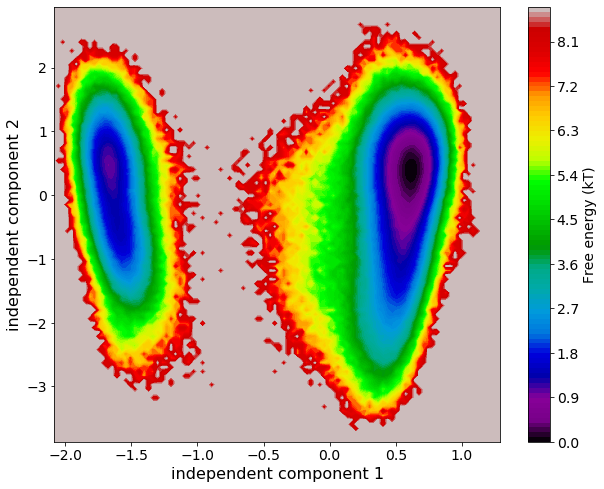

In [10]:
mplt.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])
xlabel('independent component 1'); ylabel('independent component 2'); figsize=(16, 12)
save_figure_H('free_energy-1000ps-ps-TICA-Bottleneck-Mdg.png', label_size=16, tick_size=14)

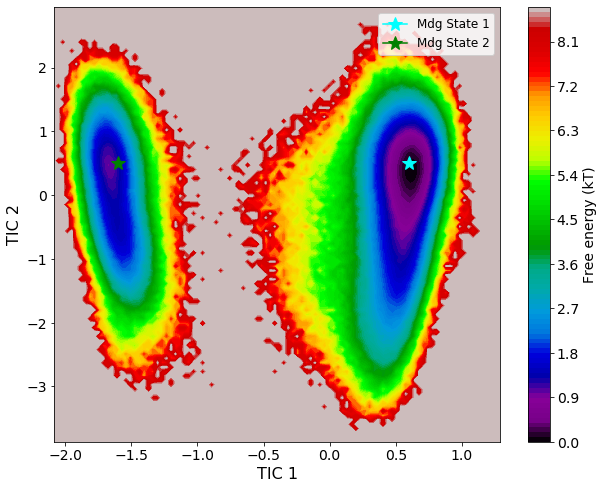

In [12]:
import mdtraj as md
import matplotlib.pyplot as plt
import pyemma.plots as mplt


# Frame indices
frame_index_Df_closed =  1586978
frame_index_Df_Open =  1459381

# Load both frames
traj_file = traj_list[0]
topology = topfile

frame_closed = md.load(traj_file, top=topology, frame=frame_index_Df_closed)
frame_open = md.load(traj_file, top=topology, frame=frame_index_Df_Open)

# Transform to feature space
features_closed = feat.transform(frame_closed)
features_open = feat.transform(frame_open)

# Project to TICA space
tica_closed = tica_obj.transform(features_closed)
tica_open = tica_obj.transform(features_open)

plt.figure(figsize=(12, 10))
mplt.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])

# Plot the two frames with colored stars
plt.plot(tica_closed[0, 0], tica_closed[0, 1], marker='*', color='cyan', markersize=15, label='Mdg State 1')
plt.plot(tica_open[0, 0], tica_open[0, 1], marker='*', color='green', markersize=15, label='Mdg State 2')

# Labels and legend
plt.xlabel('TIC 1', fontsize=14)
plt.ylabel('TIC 2', fontsize=14)
plt.legend(fontsize=12)

save_figure_H('FEL_with_Mdg_states.png', label_size=16, tick_size=14)
plt.show()

